
### Here we Explore the data we have 
In this project, I’m working with data from the 2019 Survey of Consumer Finances (SCF), a survey by the US Federal Reserve that collects financial, demographic, and opinion data from U.S. families every three years.

link to the Data: (https://www.federalreserve.gov/econres/scfindex.htm)


In [1]:
# Importing  libraries 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Prepare Data

## Import

First we imported the data.

In [4]:
df = pd.read_csv("data/SCFP2022.csv")
print("df type:", type(df))
print("df shape:", df.shape)
df.head()

df type: <class 'pandas.core.frame.DataFrame'>
df shape: (22975, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,3027.956120,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,2,1
1,1,12,3054.900065,2,70,5,9,3,2,2,...,4,2,5,2,1,8,3,3,2,1
2,1,13,3163.637766,2,70,5,9,3,2,2,...,4,2,4,2,1,8,3,3,1,1
3,1,14,3166.228463,2,70,5,9,3,2,2,...,3,2,4,1,1,6,3,2,1,1
4,1,15,3235.624715,2,70,5,9,3,2,2,...,3,2,4,2,1,8,3,3,1,1


It is a huge data over 20000 rows and 357 columns.

For this project, we're going to focus on households that have "been turned down for credit or feared being denied credit in the past 5 years". These households are identified in the "TURNFEAR" column.

In [11]:
# Here we just filter the data for credit fearfull household
mask = df['TURNFEAR'] ==1
mask.sum()  # as mask is a boolean and the true value ==1 so we use .sum() method 



3839

In [13]:
# Here we just filter the data for credit fearfull household
mask = df["TURNFEAR"] == 1
df_fear = df[mask]
print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()


df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (3839, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
20,5,51,7191.481109,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
21,5,52,7352.487205,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2
22,5,53,7270.703541,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
23,5,54,7383.866597,2,19,1,8,2,1,0,...,1,3,1,3,1,2,5,5,2,2
24,5,55,7330.537669,2,19,1,8,2,1,0,...,1,3,1,2,1,2,5,4,2,2


### Explore

## Age

Now that we have our subset, let's explore the characteristics of this group. One of the features is age group ("AGECL").

![Screenshot 2025-05-18 at 6.27.19 PM.png](<attachment:Screenshot 2025-05-18 at 6.27.19 PM.png>)
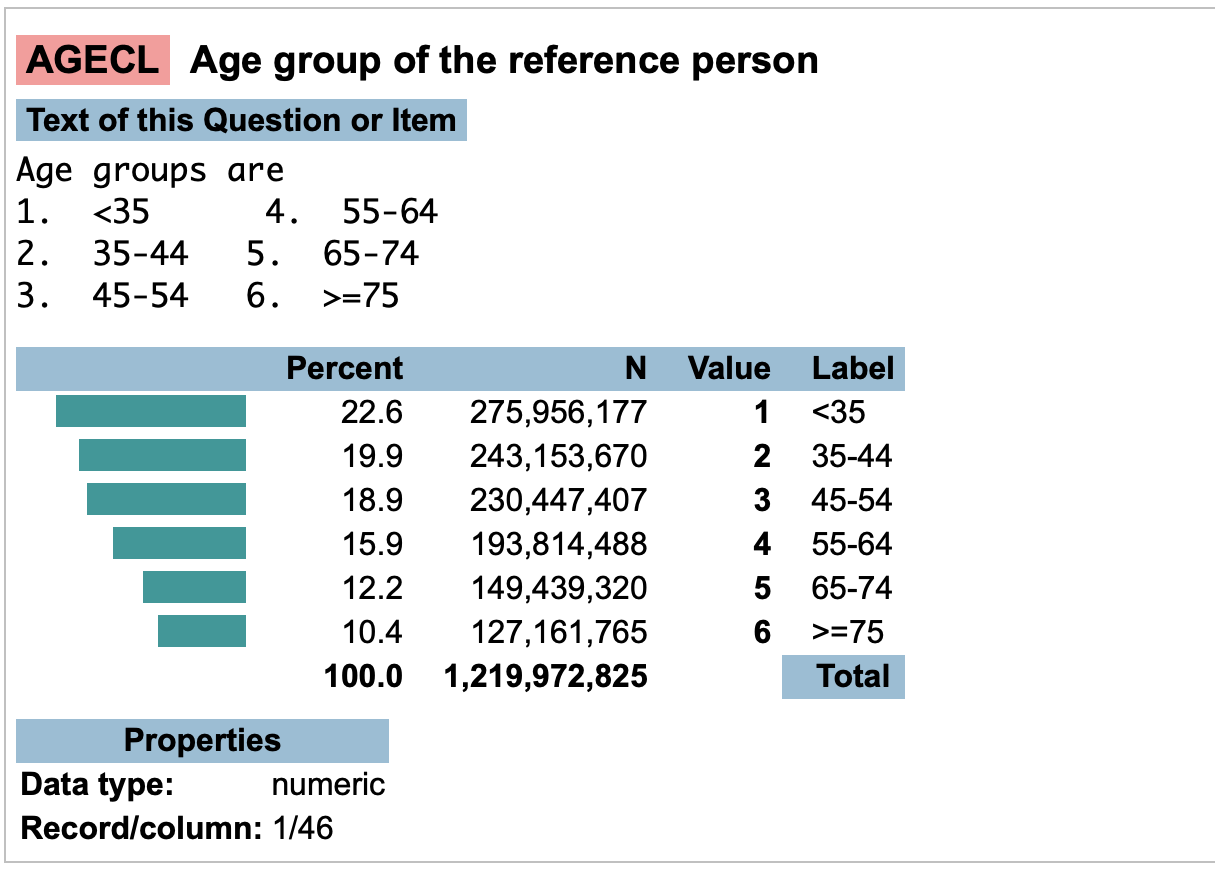

In [16]:
df_fear["AGECL"].unique()

array([1, 4, 2, 3, 5, 6])

In [18]:
# Determine the unique values in a column 
age_groups = df_fear["AGECL"].unique()
print("Age Groups:", age_groups)

Age Groups: [1 4 2 3 5 6]


"AGECL" is categorical despite having numeric values.

In [19]:
df_fear['AGECL'].head(10)

20     1
21     1
22     1
23     1
24     1
110    4
111    4
112    4
113    4
114    4
Name: AGECL, dtype: int64

In [20]:
# Create a Series agecl that contains the observations from "AGECL" using the true group names
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl = df_fear['AGECL'].replace(agecl_dict)
print("age_cl type:", type(age_cl))
print("age_cl shape:", age_cl.shape)
age_cl.head(10)

age_cl type: <class 'pandas.core.series.Series'>
age_cl shape: (3839,)


20     Under 35
21     Under 35
22     Under 35
23     Under 35
24     Under 35
110       55-64
111       55-64
112       55-64
113       55-64
114       55-64
Name: AGECL, dtype: object

In [22]:
# Now that we have better labels, let's make a bar chart and see the age distribution of our group.
age_cl.value_counts()

AGECL
35-44          936
Under 35       917
45-54          802
55-64          682
65-74          398
75 or Older    104
Name: count, dtype: int64

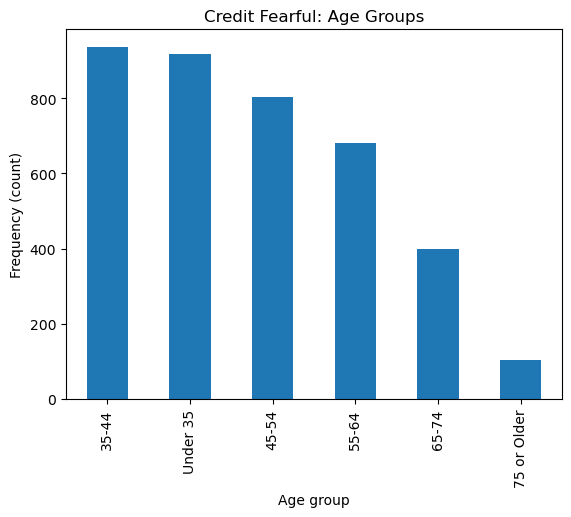

In [25]:
age_cl_value_counts = age_cl.value_counts()

# Bar plot of age_cl_value_counts

age_cl_value_counts.plot(
    kind = "bar",
    xlabel = "Age group",
    ylabel = "Frequency (count)",
    title = "Credit Fearful: Age Groups"

);